# **1. Importing Essential Packages**
This nootbook starts with importing necessary Python packages:

pandas, numpy: For data handling and numerical operations.
seaborn, matplotlib.pyplot, plotly: For visualizing data and results.
os: For file and directory operations.
cv2 (OpenCV): For reading and manipulating images.
tensorflow, torch: For building and training deep learning models.
Understanding and using these libraries will be crucial as each serves a specific purpose in the process of data handling, model building, and visualization.

# **2. Loading Images**
Using cv2 to load images from a directory structure is a common approach. This involves iterating through each subdirectory and file, loading each image, and possibly storing them in a list or an array for further processing. This step is crucial for building your dataset.

# **3. Counting Subdirectories and Images**
Understanding the structure of your dataset is vital. Counting directories and images helps you know how many categories (classes) you have and how many images are in each category, which is essential for understanding the balance of your dataset.

# **4. Analyzing Image Properties**
Investigating image properties such as size, resolution, and color distribution can provide insights into the variability within your dataset and any preprocessing steps you might need to standardize the images.

# **5. Visualizing Data Distribution**
Creating visualizations like bar charts and scatter plots helps in understanding the distribution of your data across different classes and the variations in image properties. This step is crucial for identifying imbalances or outliers that might affect model training.

# **6. Training a Basic CNN Model**
Here's where you dive into model building. A basic CNN usually consists of convolutional layers, pooling layers, and fully connected layers. The article describes the process of defining the architecture, compiling the model, and then training it on your image data.

# **7. Training a Transfer Learning Model**
Transfer learning involves using a pre-trained model and adapting it to your specific task. This approach is particularly useful when you have a small dataset or want to save time and computational resources. The article mentions adapting MobileNetV2, but there are many other models like ResNet, VGG, and Inception that you can explore.

# **8. Evaluating the Model**
Once your model is trained, it's crucial to evaluate its performance using metrics like accuracy, precision, recall, and F1-score, and by plotting accuracy and loss curves. This helps in understanding how well the model is performing and whether it's overfitting or underfitting.

# **9. Making Predictions**
Finally, the nootbook describes how to use your trained model to make predictions on new images. This involves preprocessing the image to fit the input requirements of your model, then feeding it through the model to get a prediction.

In [2]:
# Import Python Package
import pandas as pd
import numpy as np
import seaborn as sns
import os
import zipfile
import cv2
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import tensorflow as tf
from tensorflow.keras import layers, models
from plotly.subplots import make_subplots
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Model
from PIL import Image
import plotly.offline as pyo
from IPython.display import display
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix
from tensorflow.keras import layers, optimizers, callbacks

In [3]:
# mounting the drive for the dataset
from google.colab import drive
drive.mount('/content/drive',force_remount=False)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
zip_path = '/content/drive/MyDrive/Datasets/archive (2).zip'

## Locate the Zip File

In [5]:
# Define the target directory where you want to extract the content
extract_to = '/content/mammals_dataset'

# Create the directory if it does not exist
if not os.path.exists(extract_to):
    os.makedirs(extract_to)

# Define the path to the zip file
zip_path = '/content/drive/MyDrive/Datasets/archive (2).zip'

# Extract the zip file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to)

## Space Efficiency:

Keeping your data zipped until needed can save space in your Google Drive, which has limited free storage.
## Time Efficiency:

 Uploading one large zip file can be faster and more reliable than uploading many small files, especially for a large dataset.
##Extraction Location:
 Make sure you have enough space in your Colab environment to extract all files, as it offers limited and temporary storage.
italicised text

In [6]:
os.listdir(extract_to)

['mammals']

In [7]:
dataset_path = '/content/mammals_dataset/mammals'

In [8]:
mammals = os.listdir(extract_to)

# Loop through each mammal's folder and load images
for mammal in mammals:
    mammal_folder = os.path.join(extract_to, mammal)
    images = os.listdir(mammal_folder)
    for image in images:
        image_path = os.path.join(mammal_folder, image)
        if os.path.isfile(image_path):
            img = Image.open(image_path)
            # Now you can use img in your processing...

In [ ]:
extract_to = '/content/mammals_dataset/mammals'
mammals = os.listdir(extract_to)

# Decide how many images to display for each mammal category
num_images_to_display = 1

# Loop through each mammal's folder and load images
for mammal in mammals:
    mammal_folder = os.path.join(extract_to, mammal)
    images = os.listdir(mammal_folder)
    display_count = 1

    for image in images:
        image_path = os.path.join(mammal_folder, image)
        if os.path.isfile(image_path) and display_count < num_images_to_display:
            try:
                img = Image.open(image_path)

                # Display the image
                plt.imshow(img)
                plt.title(f"{mammal}: {image}")
                plt.axis('off')  # Turn off axis numbers and ticks
                plt.show()

                display_count += 1

            except IOError:
                # Handle scenario where file cannot be opened.
                print('Failed to open ', image_path)
            finally:
                # Ensure the file is closed after being used.
                img.close()


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
dataset_path = '/content/mammals_dataset/mammals'
images_to_display = 2

# Loop through each category in the dataset
for category in sorted(os.listdir(dataset_path)):
    if os.path.isdir(os.path.join(dataset_path, category)):
        print(f'Displaying images for category: {category}')

        # Initialize a counter to display a limited number of images per category
        counter = 0
        fig, axes = plt.subplots(1, images_to_display, figsize=(8, 6))

        # Loop through the images in the category
        for image_file in os.listdir(os.path.join(dataset_path, category)):
            if counter == images_to_display:
                break

            image_path = os.path.join(dataset_path, category, image_file)
            image = Image.open(image_path)
            axes[counter].imshow(image)
            axes[counter].axis('off')
            axes[counter].set_title(category)

            counter += 1

        plt.show()

In [ ]:

# counting the directories to help us about the classes / labels

subdirectories =[f.path for f in os.scandir(dataset_path) if f.is_dir()]
len(subdirectories)

45

In [ ]:
root_path = dataset_path
num_images = 0

# Iterate over each subdirectory
for dirpath, dirnames, filenames in os.walk(root_path): # absolute path
    # Count the number of image files in the current subdirectory
    for filename in filenames:
        if filename.lower().endswith(('.png', '.jpg', '.jpeg')):
            num_images += 1

    # Print the number of image files in the current subdirectory
    print(f"Found {num_images} images in directory: {dirpath}")
    num_images = 0

Found 0 images in directory: /content/mammals_dataset/mammals
Found 215 images in directory: /content/mammals_dataset/mammals/vicuna
Found 309 images in directory: /content/mammals_dataset/mammals/groundhog
Found 328 images in directory: /content/mammals_dataset/mammals/mountain_goat
Found 254 images in directory: /content/mammals_dataset/mammals/yak
Found 305 images in directory: /content/mammals_dataset/mammals/giraffe
Found 239 images in directory: /content/mammals_dataset/mammals/vampire_bat
Found 333 images in directory: /content/mammals_dataset/mammals/manatee
Found 311 images in directory: /content/mammals_dataset/mammals/dolphin
Found 314 images in directory: /content/mammals_dataset/mammals/water_buffalo
Found 299 images in directory: /content/mammals_dataset/mammals/anteater
Found 278 images in directory: /content/mammals_dataset/mammals/jackal
Found 315 images in directory: /content/mammals_dataset/mammals/wombat
Found 315 images in directory: /content/mammals_dataset/mammal

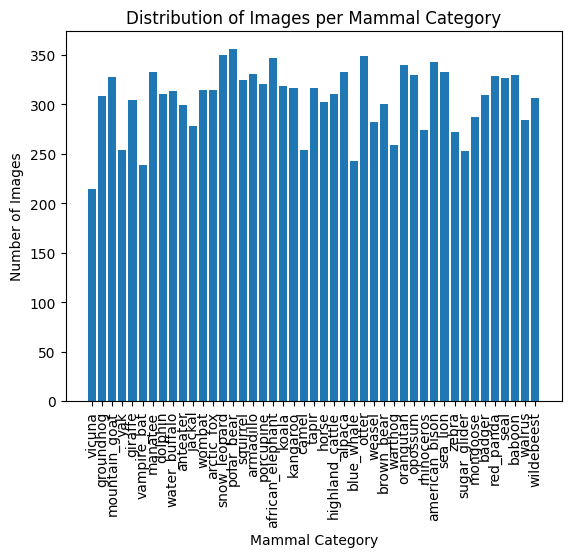

In [ ]:
subdirectory_names = [d for d in os.listdir(root_path) if os.path.isdir(os.path.join(root_path, d))]

# Initialize a list to count the number of images in each subdirectory
counts = []

# Count the number of images in each subdirectory
for subdirectory in subdirectory_names:
    directory_path = os.path.join(root_path, subdirectory)
    # Count files and consider only image files
    image_files = [file for file in os.listdir(directory_path) if file.lower().endswith(('.png', '.jpg', '.jpeg'))]
    counts.append(len(image_files))

# Create a bar chart to visualize the distribution
plt.bar(subdirectory_names, counts)
plt.xticks(rotation=90)
plt.ylabel("Number of Images")
plt.xlabel("Mammal Category")
plt.title("Distribution of Images per Mammal Category")
plt.show()

Image valuable information about the characteristics of the images and helps us identify any patterns or anomalies within the dataset.properties to valuable information about
the characteristics of the images and helps us

In [ ]:
sizes = []
resolutions = []
color_distributions = []

# Iterate over each image file in each subdirectory
for dirpath, dirnames, filenames in os.walk(root_path):
    for filename in filenames:
        if filename.lower().endswith(('.png', '.jpg', '.jpeg')):
            # Load the image file using OpenCV
            img_path = os.path.join(dirpath, filename)
            img = cv2.imread(img_path)

            # Extract the size of the image
            size = os.path.getsize(img_path)
            sizes.append(size)

            # Extract the resolution of the image
            resolution = img.shape[:2]
            resolutions.append(resolution)

            # Extract the color distribution of the image
            color_distribution = np.bincount(img.flatten(), minlength=256)
            color_distributions.append(color_distribution)

# Convert the lists to numpy arrays for easier manipulation
sizes = np.array(sizes)
resolutions = np.array(resolutions)
color_distributions = np.array(color_distributions)

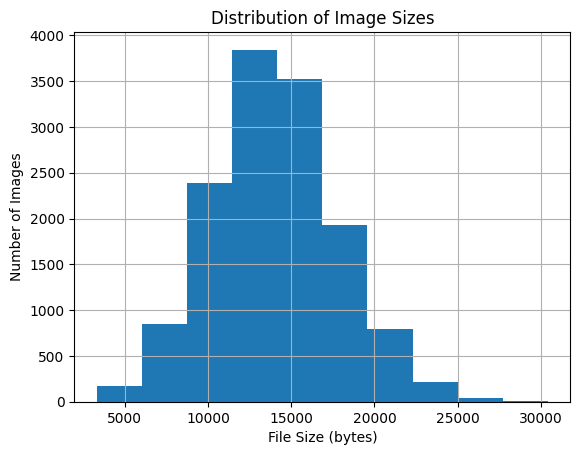

In [ ]:
plt.hist(sizes)
plt.title("Distribution of Image Sizes")
plt.xlabel("File Size (bytes)")
plt.ylabel("Number of Images")
plt.grid()
plt.show()

In [ ]:
sizes = []

# Iterate over each file in the root directory and its subdirectories
for dirpath, dirnames, filenames in os.walk(root_path):
    for filename in filenames:
        # Get the full path of the file
        file_path = os.path.join(dirpath, filename)
        # Get the file size in bytes
        file_size = os.path.getsize(file_path)
        # Convert file size to MB and add to the list
        sizes.append(file_size / 1_000_000)

# Create a histogram figure with plotly
fig = px.histogram(x=sizes, nbins=50, title="Distribution of Image Sizes")

# Customize the plot
fig.update_layout(
    xaxis_title="File Size (MB)",
    yaxis_title="Number of Images",
    showlegend=False,
    bargap=0.1,
    bargroupgap=0.1
)
fig.show()

In [ ]:
fig = px.scatter(x=resolutions[:, 0], y=resolutions[:, 1], title="Distribution of Image Resolutions")

# Customize the plot
fig.update_layout(
    xaxis_title="Width (pixels)",
    yaxis_title="Height (pixels)",
    showlegend=False,
    hovermode="closest",
    width=800,
    height=600,
    margin=dict(l=50, r=50, b=50, t=50, pad=4)
)

# Show the plot
fig.show()
# yakeen aa gya ha

Plotting the Mean Color Distribution

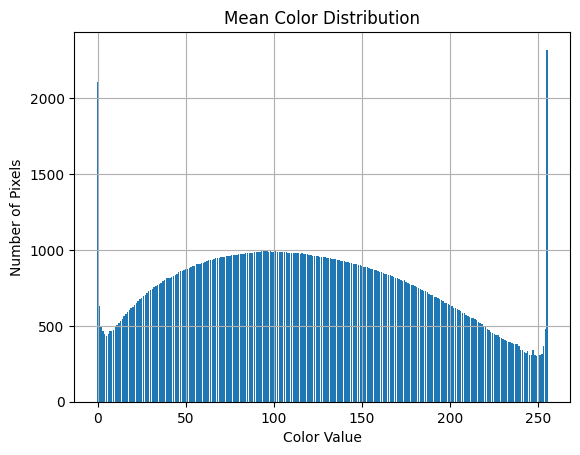

In [ ]:
mean_color_distribution = np.mean(color_distributions, axis=0)

# Plot a bar chart of the mean color distribution
plt.bar(np.arange(256), mean_color_distribution)
plt.title("Mean Color Distribution")
plt.xlabel("Color Value")
plt.ylabel("Number of Pixels")
plt.grid()
plt.show()

# Models Tranings

most of your images' pixels are of medium intensity, neither very dark nor very bright.

In [ ]:
# Colour distribution at each image

traces = []
for i in range(256):
    traces.append(go.Bar(x=np.arange(len(color_distributions)), y=color_distributions[:, i], name=str(i)))

# Create the figure and set the layout
fig = go.Figure(data=traces)
fig.update_layout(title="Color Distributions for Each Image", xaxis_title="Image Index", yaxis_title="Number of Pixels", barmode="stack")
# Show the plot
fig.show()

Found 13751 files belonging to 45 classes.
Using 9626 files for training.
Found 13751 files belonging to 45 classes.
Using 4125 files for validation.
['african_elephant', 'alpaca', 'american_bison', 'anteater', 'arctic_fox', 'armadillo', 'baboon', 'badger', 'blue_whale', 'brown_bear', 'camel', 'dolphin', 'giraffe', 'groundhog', 'highland_cattle', 'horse', 'jackal', 'kangaroo', 'koala', 'manatee', 'mongoose', 'mountain_goat', 'opossum', 'orangutan', 'otter', 'polar_bear', 'porcupine', 'red_panda', 'rhinoceros', 'sea_lion', 'seal', 'snow_leopard', 'squirrel', 'sugar_glider', 'tapir', 'vampire_bat', 'vicuna', 'walrus', 'warthog', 'water_buffalo', 'weasel', 'wildebeest', 'wombat', 'yak', 'zebra']


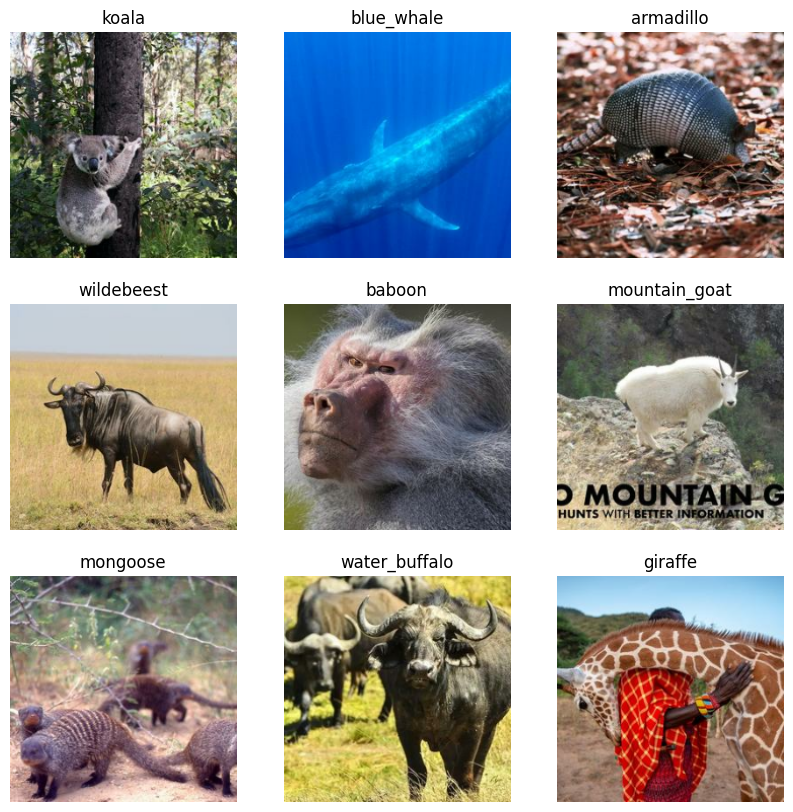

In [ ]:
# Define the batch size and image size
batch_size = 32
img_size = (224, 224)

data_dir = root_path

# Use the `image_dataset_from_directory` function to create a dataset
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.3, # Split the data into training and validation sets
    subset='training',
    seed=123,
    image_size=img_size,
    batch_size=batch_size,
)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.3,
    subset='validation',
    seed=123,
    image_size=img_size,
    batch_size=batch_size,
)

# Print the class names
class_names = train_ds.class_names
print(class_names)

# Visualize some of the images
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype('uint8'))
        plt.title(class_names[labels[i]])
        plt.axis('off')

## CNN

In [12]:
 #Create the model
model = models.Sequential([
    layers.experimental.preprocessing.Rescaling(1./255, input_shape=(224, 224, 3)),
    layers.Conv2D(16, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(len(class_names))
])

# Compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Train the model on the training data
history = model.fit(train_ds, epochs=50, validation_data=val_ds)

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = model.fit(train_ds, epochs=20, validation_data=val_ds, callbacks=[early_stopping])

model.save('convulution_neural_networks.hdf')


NameError: ignored

According to The training data accuracy, it also increases slowly slowly, and increasing on the other hand, the losses is decreasing and and the last three Epoch decreasing


And on the other hand, validation accuracy, increasing in start, and after also decreasing towards the last Epoch and losses increasing

So it's mean, it's a clear indication of the overfitting of the data mean the model is good for the training data, but when we put unseen data, it will not give given an accurate


So far, I think I need to change the model complexity, or maybe that documentation or or something related to normalisation or whatever. I think I need to change in.
\

In [ ]:
fig1 = make_subplots()
fig1.add_trace(go.Scatter(x=list(range(1,11)), y=history.history['accuracy'], name='Training Accuracy'))
fig1.add_trace(go.Scatter(x=list(range(1,11)), y=history.history['val_accuracy'], name='Validation Accuracy'))
fig1.update_layout(title='Training and Validation Accuracy', xaxis_title='Epoch', yaxis_title='Accuracy')
fig1.show()

# Plot the training and validation loss
fig2 = make_subplots()
fig2.add_trace(go.Scatter(x=list(range(1,11)), y=history.history['loss'], name='Training Loss'))
fig2.add_trace(go.Scatter(x=list(range(1,11)), y=history.history['val_loss'], name='Validation Loss'))
fig2.update_layout(title='Training and Validation Loss', xaxis_title='Epoch', yaxis_title='Loss')
fig2.show()

In [ ]:
# from tensorflow.keras.callbacks import EarlyStopping

# model = models.Sequential([
#     layers.experimental.preprocessing.Rescaling(1./255, input_shape=(224, 224, 3)),
#     layers.Conv2D(16, (3, 3), activation='relu'),
#     layers.MaxPooling2D((2, 2)),
#     layers.Conv2D(32, (3, 3), activation='relu'),
#     layers.MaxPooling2D((2, 2)),
#     layers.Conv2D(64, (3, 3), activation='relu'),
#     layers.MaxPooling2D((2, 2)),
#     layers.Flatten(), # connec the previous learned features towards the higer layer and reduce the dimensiosn
#     layers.Dropout(0.5),  # Add dropout
#     layers.Dense(64, activation='relu'),
#     layers.Dense(len(class_names))
# ])

# # Compile the model
# model.compile(optimizer='adam',
#               loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
#               metrics=['accuracy'])

# early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# history = model.fit(train_ds, epochs=50, validation_data=val_ds, callbacks=[early_stopping])

# # Train the model with EarlyStopping
# history = model.fit(train_ds, epochs=50, validation_data=val_ds, callbacks=[early_stopping])
# print()
# print()

# # Evaluate the model on the test set
# test_loss, test_accuracy = model.evaluate(test_ds)
# print(f'Test accuracy: {test_accuracy}')



# model.save('densenet121_mammal_classifier.hdf')


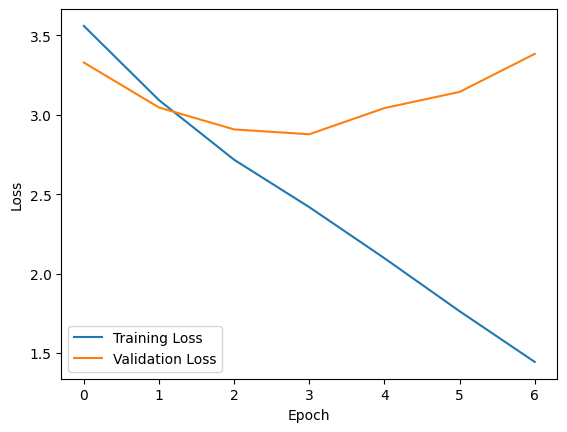

In [ ]:


# Plot training history
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [ ]:
 #Create the model
model = models.Sequential([
    layers.experimental.preprocessing.Rescaling(1./255, input_shape=(224, 224, 3)),
    layers.Conv2D(16, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(len(class_names))
])

# Compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Train the model on the training data
history = model.fit(train_ds, epochs=20, validation_data=val_ds)

early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

history = model.fit(train_ds, epochs=20, validation_data=val_ds, callbacks=[early_stopping])

In [ ]:
# # Define the batch size and image size
# batch_size = 32
# img_size = (224, 224)

# # Define the paths
# data_dir = root_path

# # Load the datasets with a split for training, validation, and testing
# train_ds = tf.keras.preprocessing.image_dataset_from_directory(
#     data_dir,
#     validation_split=0.7,
#     subset='training',
#     seed=123,
#     image_size=img_size,
#     batch_size=batch_size,
#     label_mode='categorical'  # Use categorical for multi-class classification
# )

# val_ds = tf.keras.preprocessing.image_dataset_from_directory(
#     data_dir,
#     validation_split=0.2,
#     subset='validation',
#     seed=123,
#     image_size=img_size,
#     batch_size=batch_size,
#     label_mode='categorical'
# )

# test_ds = tf.keras.preprocessing.image_dataset_from_directory(
#     data_dir,
#     validation_split=0.1,
#     subset='validation',
#     seed=123,
#     image_size=img_size,
#     batch_size=batch_size,
#     label_mode='categorical'
# )

# # Configure the dataset for performance
# AUTOTUNE = tf.data.experimental.AUTOTUNE
# train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
# val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)
# test_ds = test_ds.cache().prefetch(buffer_size=AUTOTUNE)

# # Define the model architecture with regularization and dropout
# model = models.Sequential([
#     layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_size[0], img_size[1], 3)),
#     layers.Conv2D(32, 3, padding='same', activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
#     layers.MaxPooling2D(),
#     layers.Conv2D(64, 3, padding='same', activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
#     layers.MaxPooling2D(),
#     layers.Conv2D(128, 3, padding='same', activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
#     layers.MaxPooling2D(),
#     layers.Dropout(0.5),
#     layers.Flatten(),
#     layers.Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
#     layers.Dense(45, activation='softmax')  # 45 classes, so the output layer has 45 neurons with softmax
# ])

# # Compile the model with an optimizer and learning rate schedule
# initial_learning_rate = 0.001
# lr_schedule = optimizers.schedules.ExponentialDecay(
#     initial_learning_rate,
#     decay_steps=100000,
#     decay_rate=0.96,
#     staircase=True)

# model.compile(optimizer=optimizers.Adam(learning_rate=lr_schedule),
#               loss='categorical_crossentropy',  # Use categorical_crossentropy for multi-class classification
#               metrics=['accuracy'])

# # Add early stopping and model checkpointing
# early_stopping = callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
# model_checkpoint = callbacks.ModelCheckpoint(
#     filepath='best_model.h5',  # Path to save model
#     save_best_only=True,
#     monitor='val_loss',
#     verbose=1)

# # Train the model
# history = model.fit(
#     train_ds,
#     epochs=50,  # Increased number of epochs for better convergence
#     validation_data=val_ds,
#     callbacks=[early_stopping, model_checkpoint]
# )

# # Load the best model
# best_model = tf.keras.models.load_model('best_model.h5')

# # Evaluate on the test set
# test_loss, test_accuracy = best_model.evaluate(test_ds)
# print(f'Test accuracy: {test_accuracy}')


Found 13751 files belonging to 45 classes.
Using 4126 files for training.
Found 13751 files belonging to 45 classes.
Using 2750 files for validation.
Found 13751 files belonging to 45 classes.
Using 1375 files for validation.
Epoch 1/50
129/129 [==============================] - ETA: 0s - loss: 4.0193 - accuracy: 0.0385
Epoch 1: val_loss improved from inf to 3.80711, saving model to best_model.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning:

You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.



129/129 [==============================] - 634s 5s/step - loss: 4.0193 - accuracy: 0.0385 - val_loss: 3.8071 - val_accuracy: 0.0505
Epoch 2/50
129/129 [==============================] - ETA: 0s - loss: 3.6115 - accuracy: 0.0979
Epoch 2: val_loss improved from 3.80711 to 3.52259, saving model to best_model.h5
129/129 [==============================] - 622s 5s/step - loss: 3.6115 - accuracy: 0.0979 - val_loss: 3.5226 - val_accuracy: 0.0953
Epoch 3/50
129/129 [==============================] - ETA: 0s - loss: 3.3873 - accuracy: 0.1444
Epoch 3: val_loss improved from 3.52259 to 3.46692, saving model to best_model.h5
129/129 [==============================] - 575s 4s/step - loss: 3.3873 - accuracy: 0.1444 - val_loss: 3.4669 - val_accuracy: 0.1218
Epoch 4/50
129/129 [==============================] - ETA: 0s - loss: 3.2110 - accuracy: 0.1803
Epoch 4: val_loss improved from 3.46692 to 3.42301, saving model to best_model.h5
129/129 [==============================] - 620s 5s/step - loss: 3.2110

avoid google colab to stop Runtime from Closing with JavaScript solved !

In [ ]:
# function ConnectButton(){
#     console.log("Connect pushed");
#     document.querySelector("#top-toolbar > colab-connect-button").shadowRoot.querySelector("#connect").click()
# }

# var colab = setInterval(ConnectButton,60000);

Start with different apporach

# Densenet model


In [ ]:
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.callbacks import EarlyStopping


# Define the paths
root_path = dataset_path
data_dir = root_path

# Define batch size, image size, and number of classes
batch_size = 32
img_size = (224, 224)  # DenseNet121 default image size is 224x224
num_classes = 45  # replace with the actual number of classes

# Load the datasets with a split for training, validation, and testing
train_ds = image_dataset_from_directory(
    data_dir,
    validation_split=0.7,
    subset='training',
    seed=123,
    image_size=img_size,
    batch_size=batch_size,
    label_mode='categorical'
)

val_ds = image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset='validation',
    seed=123,
    image_size=img_size,
    batch_size=batch_size,
    label_mode='categorical'
)

test_ds = image_dataset_from_directory(
    data_dir,
    validation_split=0.1,
    subset='validation',
    seed=123,
    image_size=img_size,
    batch_size=batch_size,
    label_mode='categorical'
)

# Configure the dataset for performance
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)
test_ds = test_ds.cache().prefetch(buffer_size=AUTOTUNE)

# Load the DenseNet121 model pre-trained on ImageNet data
base_model = DenseNet121(weights='imagenet', include_top=False, input_shape=(img_size[0], img_size[1], 3))
base_model.trainable = False  # Freeze the base_model

# Create a new model on top
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(1024, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(num_classes, activation='softmax')  # Final layer with 'softmax' for multi-class classification
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Define EarlyStopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model with EarlyStopping
history = model.fit(train_ds, epochs=50, validation_data=val_ds, callbacks=[early_stopping])
print()
print()

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_ds)
print(f'Test accuracy: {test_accuracy}')

model.save('densenet121_mammal_classifier.hdf')  # Saves the DenseNet121 model


Found 13751 files belonging to 45 classes.
Using 4126 files for training.
Found 13751 files belonging to 45 classes.
Using 2750 files for validation.
Found 13751 files belonging to 45 classes.
Using 1375 files for validation.
Epoch 1/50
129/129 [==============================] - 42s 197ms/step - loss: 4.6879 - accuracy: 0.0897 - val_loss: 3.4084 - val_accuracy: 0.1513
Epoch 2/50
129/129 [==============================] - 22s 167ms/step - loss: 3.3833 - accuracy: 0.1372 - val_loss: 3.2373 - val_accuracy: 0.1811
Epoch 3/50
129/129 [==============================] - 23s 176ms/step - loss: 3.2195 - accuracy: 0.1667 - val_loss: 3.1308 - val_accuracy: 0.1996
Epoch 4/50
129/129 [==============================] - 24s 190ms/step - loss: 3.0773 - accuracy: 0.1915 - val_loss: 3.0233 - val_accuracy: 0.2120
Epoch 5/50
129/129 [==============================] - 22s 170ms/step - loss: 2.9351 - accuracy: 0.2130 - val_loss: 2.9360 - val_accuracy: 0.2255
Epoch 6/50
129/129 [=============================

# VGG16 model


In [ ]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing import image_dataset_from_directory

batch_size = 32 # iamges
img_size = (224, 224)

# Define the paths
root_path = dataset_path
data_dir = root_path

# Load the datasets with a split for training, validation, and testing
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.7,
    subset='training',
    seed=123,
    image_size=img_size,
    batch_size=batch_size,
    label_mode='categorical'  # Use categorical for multi-class classification
)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset='validation',
    seed=123,
    image_size=img_size,
    batch_size=batch_size,
    label_mode='categorical'
)

test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.1,
    subset='validation',
    seed=123,
    image_size=img_size,
    batch_size=batch_size,
    label_mode='categorical'
)




# Configure the dataset for performance
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

# Load the VGG16 model pre-trained on ImageNet data
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(img_size[0], img_size[1], 3))

# Freeze the base_model
base_model.trainable = False

# Create a new model on top
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(1024, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(45, activation='softmax')  # Assuming you have 45 classes
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(train_ds, epochs=25, validation_data=val_ds)
print()
print()

# Evaluate the model
val_loss, val_accuracy = model.evaluate(val_ds)
print(f'Validation accuracy: {val_accuracy}')
print()



# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_ds)
print(f'Test accuracy: {test_accuracy}')

# save the model with architecture and
model.save('vgg16_mammal_classifier.hdf')

Found 13751 files belonging to 45 classes.
Using 4126 files for training.
Found 13751 files belonging to 45 classes.
Using 2750 files for validation.
Found 13751 files belonging to 45 classes.
Using 1375 files for validation.
58889256/58889256 [==============================] - 0s 0us/step
Epoch 1/5
129/129 [==============================] - 70s 355ms/step - loss: 3.3396 - accuracy: 0.4307 - val_loss: 0.9865 - val_accuracy: 0.7207
Epoch 2/5
129/129 [==============================] - 27s 206ms/step - loss: 1.0778 - accuracy: 0.6949 - val_loss: 0.7996 - val_accuracy: 0.7724
Epoch 3/5
129/129 [==============================] - 37s 286ms/step - loss: 0.7328 - accuracy: 0.7887 - val_loss: 0.6644 - val_accuracy: 0.8073
Epoch 4/5
129/129 [==============================] - 28s 214ms/step - loss: 0.5660 - accuracy: 0.8308 - val_loss: 0.7114 - val_accuracy: 0.8033
Epoch 5/5
129/129 [==============================] - 29s 223ms/step - loss: 0.4514 - accuracy: 0.8621 - val_loss: 0.7052 - val_accura



VGG16 Last iteration validation accuracy


In [ ]:
# Evaluate the model on the validation set
val_loss, val_accuracy = model.evaluate(val_ds)
print(f'Validation accuracy: {val_accuracy}')

86/86 [==============================] - 11s 131ms/step - loss: 0.7685 - accuracy: 0.8164
Validation accuracy: 0.8163636326789856


# RESNET50

In [ ]:
from tensorflow.keras.applications import ResNet50

AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

# Load the ResNet50 model pre-trained on ImageNet data
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(img_size[0], img_size[1], 3))

# Freeze the base_model
base_model.trainable = False

# Create a new model on top
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(1024, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(45, activation='softmax')  # Assuming you have 45 classes
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(train_ds, epochs=50, validation_data=val_ds)

# Evaluate the model
val_loss, val_accuracy = model.evaluate(val_ds)
print(f'Validation accuracy: {val_accuracy}')
print()
print()


# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_ds)
print(f'Test accuracy: {test_accuracy}')

# used in other apps
model.save('resnet50_mammal_classifier.hdf')



94765736/94765736 [==============================] - 7s 0us/step
Epoch 1/50
129/129 [==============================] - 29s 187ms/step - loss: 1.5644 - accuracy: 0.6018 - val_loss: 0.6010 - val_accuracy: 0.8262
Epoch 2/50
129/129 [==============================] - 23s 176ms/step - loss: 0.5806 - accuracy: 0.8291 - val_loss: 0.5272 - val_accuracy: 0.8487
Epoch 3/50
129/129 [==============================] - 22s 168ms/step - loss: 0.4075 - accuracy: 0.8759 - val_loss: 0.4836 - val_accuracy: 0.8633
Epoch 4/50
129/129 [==============================] - 21s 166ms/step - loss: 0.3089 - accuracy: 0.9006 - val_loss: 0.4482 - val_accuracy: 0.8695
Epoch 5/50
129/129 [==============================] - 23s 181ms/step - loss: 0.2582 - accuracy: 0.9205 - val_loss: 0.4724 - val_accuracy: 0.8738
Epoch 6/50
129/129 [==============================] - 23s 182ms/step - loss: 0.2050 - accuracy: 0.9326 - val_loss: 0.4392 - val_accuracy: 0.8753
Epoch 7/50
129/129 [==============================] - 22s 170ms/s

In [ ]:
from google.colab import files
# Replace 'your_hdf_file.h5' with the path to your HDF file in the Colab environment
file_path = '/content/vgg16_mammal_classifier.hdf'

# This will prompt you to download the file to your local machine
files.download(file_path)

In [ ]:
from google.colab import files
files.download('model_name.h5')  # Replace with your model's filename




ValueError: ignored

In [9]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [10]:
pwd


'/content'

In [ ]:
!cp -r /content/resnet50_mammal_classifier.hdf /content/drive/MyDrive/


In [ ]:
from google.colab import files
# files.download("/content/drive/MyDrive/2024")

files.download("/content/vgg16_mammal_classifier.hdf")

In [ ]:
# for densenet
!cp -r /content/densenet121_mammal_classifier.hdf /content/drive/MyDrive/

In [ ]:
files.download("/content/densenet121_mammal_classifier.hdf")